In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# fix random seed for reproducibility
np.random.seed(7)

In [72]:
df = pd.read_csv("D:/ML Projects/airline-passengers.csv", usecols = [1])
data = df.values
data = data.astype('float32')

scaler = MinMaxScaler(feature_range = (0,1))
data = scaler.fit_transform(data)


In [74]:
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size

train, test = data[0:train_size, :], data[train_size:len(data), :]
print(len(train), len(test))

96 48


In [76]:
def helper(data, look_back = 1):
    dataX, dataY = [], []
    
    for i in range(len(data) - look_back - 1):
        var = data[i: (i + look_back), 0]
        dataX.append(var)
        dataY.append(data[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)        

In [78]:
look_back = 1

trainX, trainY = helper(train, look_back)
testX, testY = helper(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, test.shape[1]))

In [80]:
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 20ms/step - loss: 0.0449
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0222
Epoch 3/100
94/94 - 0s - 2ms/step - loss: 0.0174
Epoch 4/100
94/94 - 0s - 2ms/step - loss: 0.0158
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0147
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0137
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0128
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0118
Epoch 9/100
94/94 - 0s - 2ms/step - loss: 0.0108
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0099
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0089
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0080
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0070
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0063
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0054
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0047
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0041
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0036
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0032
Epoch 20/100
94/94 - 0s - 2ms/step - loss: 0.0028
Epoch 21/100
94/94 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


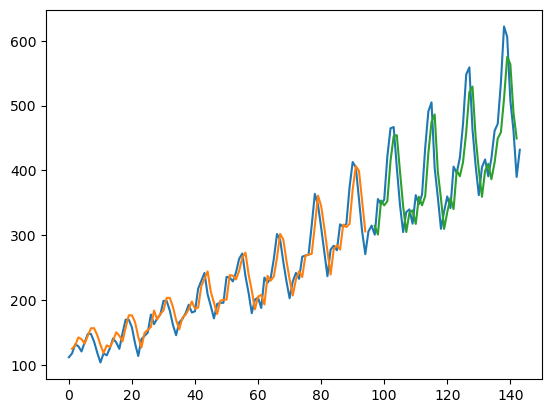

In [110]:
train_pred = model.predict(trainX)
test_pred = model.predict(testX)

train_pred = scaler.inverse_transform(train_pred)
trainY = scaler.inverse_transform(trainY)

test_pred = scaler.inverse_transform(test_pred)
testY = scaler.inverse_transform(testY)

train_score = math.sqrt(mean_squared_error(trainY[0], train_pred[:, 0]))
test_score = math.sqrt(mean_squared_error(testY[0], test_pred[:, 0]))

train_pred_plot = np.empty_like(data)
train_pred_plot[:, :] = np.nan
train_pred_plot[look_back : len(train_pred) + look_back, :] = train_pred

test_pred_plot = np.empty_like(data)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred) + (look_back * 2) + 1 : len(data) - 1, :] = test_pred

plt.plot(scaler.inverse_transform(data))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)

plt.show()